In [1]:
import numpy as np
import kbmod.analysis.trajectory_utils as tu
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

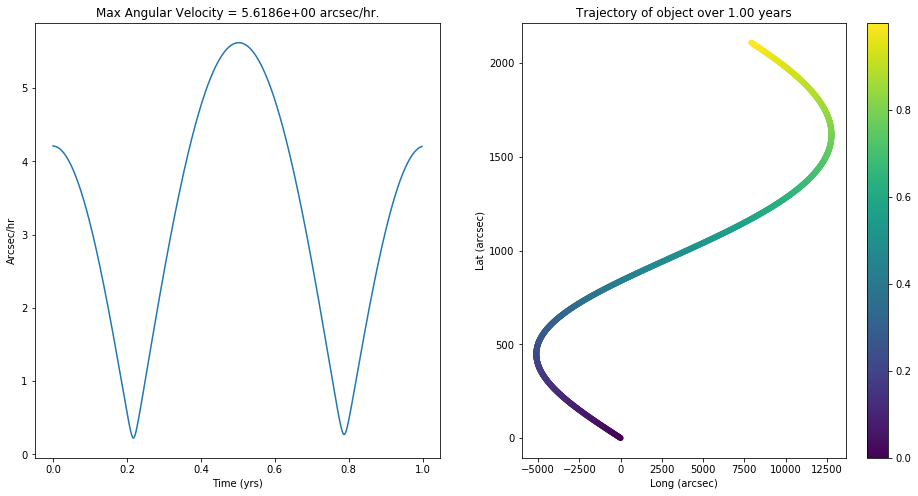

In [2]:
radius = 30  # in AU
inclination = 15.0  # in degrees
max_time = 1.0  # in years
time_step = 0.001  # in years
theta_0 = 0.0  # Object's progress along orbit in degrees.
# Note: Would be more useful to have angle from opposition probably. Will update in future.
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
tu.plot_ang_vel(radius, inclination, max_time, time_step, theta_0)
fig.add_subplot(1, 2, 2)
tu.plot_trajectory(radius, inclination, max_time, time_step, theta_0)

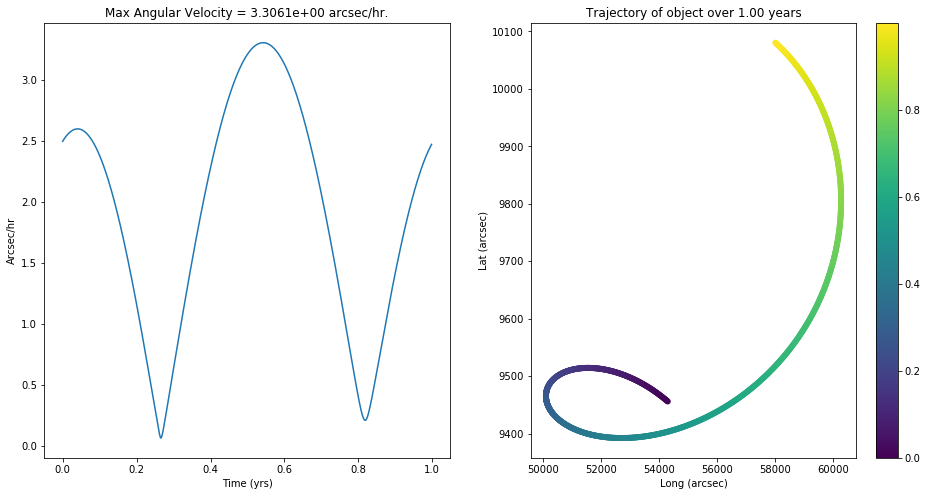

In [3]:
radius = 50  # in AU
inclination = 10  # in degrees
max_time = 1.0  # in years
time_step = 0.001  # in years
theta_0 = 15.0  # Object's progress along orbit in degrees.
# Note: Would be more useful to have angle from opposition probably. Will update in future.
fig = plt.figure(figsize=(16, 8))
fig.add_subplot(1, 2, 1)
tu.plot_ang_vel(radius, inclination, max_time, time_step, theta_0)
fig.add_subplot(1, 2, 2)
tu.plot_trajectory(radius, inclination, max_time, time_step, theta_0)

In [4]:
radius = 30
incl = 15.0
time_step = 0.001

In [5]:
lon, lat = tu.get_trajectory(radius, incl, time_step)

In [6]:
# Sample NEO field
field_central_lat = 0.0
in_field = np.where((lat < (field_central_lat + 1.0)) & (lat > (field_central_lat - 1.0)))[0]

In [7]:
percent_in_field = float(len(in_field)) / len(lat) * 100.0
print(
    str(
        "Object at radius %i AU and %.1f degree inclination will be in ecliptic latitudes "
        + "between +/- 1 deg of %.2f degrees %.2f percent of the time."
    )
    % (radius, incl, field_central_lat, percent_in_field)
)

Object at radius 30 AU and 15.0 degree inclination will be in ecliptic latitudes between +/- 1 deg of 0.00 degrees 4.33 percent of the time.


In [8]:
ang_vel, ang_travelled = tu.get_ang_vel(radius, incl, time_step)

In [9]:
print(str("Absolute maximum velocity of object across sky: %.4f arcsec/hr." % np.max(ang_vel)))

Absolute maximum velocity of object across sky: 5.6497 arcsec/hr.


In [10]:
print(str("Absolute minimum velocity of object across sky: %.4f arcsec/hr." % np.min(ang_vel)))

Absolute minimum velocity of object across sky: 0.0060 arcsec/hr.


In [11]:
# Search only looks at trajectories within 12 degrees of parallel to a search angle
# eclip_offset degrees from parallel to the ecliptic
search_width = 12.0
eclip_offset = 0.0
in_search = np.where((np.abs(ang_travelled[in_field[:-1]] - eclip_offset) < search_width))[0]

In [12]:
percent_in_search = float(len(in_search)) / (len(in_field) - 1) * 100.0

In [13]:
print(
    str(
        "Object trajectory will fall in search angular parameters %.2f percent of the time"
        + " that it is in these latitudes."
    )
    % (percent_in_search)
)

Object trajectory will fall in search angular parameters 49.49 percent of the time that it is in these latitudes.


In [14]:
# Search sets minimum velocity at 1 arcsec/hour
min_vel = 1.0
max_vel = 5.7
percent_in_search_vel = (
    len(
        np.where(
            (ang_vel[in_field[:-1]][in_search] > min_vel) & (ang_vel[in_field[:-1]][in_search] < max_vel)
        )[0]
    )
    / float(len(ang_vel[in_field[:-1]][in_search]))
) * 100.0

In [15]:
print(
    str(
        "Object velocity parameters cover %.2f percent of possible objects " + "in search angular parameters."
    )
    % (percent_in_search_vel)
)

Object velocity parameters cover 99.21 percent of possible objects in search angular parameters.


In [16]:
min_obj_vel = np.min(ang_vel[in_field[:-1]][in_search])
max_obj_vel = np.max(ang_vel[in_field[:-1]][in_search])
print(
    str(
        "Minimum/Maximum object velocity with radius %i AU and %.1f degree inclination "
        + "in search field is %.3f/%.3f arcseconds per hour."
    )
    % (radius, incl, min_obj_vel, max_obj_vel)
)

Minimum/Maximum object velocity with radius 30 AU and 15.0 degree inclination in search field is 0.704/5.619 arcseconds per hour.
